In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('divvy_tripdata_Q1.csv')  

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,duration,distance_km,started_date,duration_seconds
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,Saturday,0 days 00:10:51,0.839042,2023-01-21,651.0
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,Tuesday,0 days 00:08:29,1.204573,2023-01-10,509.0
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,Monday,0 days 00:13:14,3.543683,2023-01-02,794.0
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,Sunday,0 days 00:08:46,1.204573,2023-01-22,526.0
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,Thursday,0 days 00:15:19,1.204573,2023-01-12,919.0


# Check if each row of the record is from the same day

In [11]:
# Convert columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extract date part and compare
diff_day = df[df['started_at'].dt.date != df['ended_at'].dt.date]

In [12]:
diff_day

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,duration,distance_km,started_date,duration_seconds
571,F4F4A74BF1FB016D,classic_bike,2023-01-06 15:59:56,2023-01-07 16:41:17,LaSalle St & Jackson Blvd,TA1309000004,Canal St & Jackson Blvd,13138,41.878166,-87.631929,41.877245,-87.639366,member,Friday,1 days 00:41:21,0.624187,2023-01-06,88881.0
1246,35ED285260EA31D4,docked_bike,2023-01-09 23:52:18,2023-01-10 00:13:54,Damen Ave & Division St,13136,Hermitage Ave & Polk St,13080,41.903266,-87.678435,41.871514,-87.669886,casual,Monday,0 days 00:21:36,3.600887,2023-01-09,1296.0
1523,033B4C3E42E4913E,classic_bike,2023-01-17 23:55:31,2023-01-18 00:11:48,Michigan Ave & Madison St,13036,Racine Ave & 15th St,13304,41.882134,-87.625125,41.861267,-87.656625,member,Tuesday,0 days 00:16:17,3.490928,2023-01-17,977.0
1712,5240E906A85B2873,classic_bike,2023-01-08 23:53:23,2023-01-09 00:19:39,Mies van der Rohe Way & Chicago Ave,13338,Racine Ave & Belmont Ave,TA1308000019,41.896945,-87.621758,41.939743,-87.658865,member,Sunday,0 days 00:26:16,5.663407,2023-01-08,1576.0
2625,169857267FAE6BD1,classic_bike,2023-01-21 23:58:37,2023-01-22 00:06:07,Michigan Ave & Washington St,13001,Michigan Ave & 8th St,623,41.883984,-87.624684,41.872773,-87.623981,casual,Saturday,0 days 00:07:30,1.247971,2023-01-21,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638433,995F787349DCBCE0,docked_bike,2023-03-31 23:45:19,2023-04-01 00:01:46,Wabash Ave & Roosevelt Rd,TA1305000002,Indiana Ave & Roosevelt Rd,SL-005,41.867227,-87.625961,41.867888,-87.623041,casual,Friday,0 days 00:16:27,0.252717,2023-03-31,987.0
638515,F6FC84B23466C96F,electric_bike,2023-03-18 23:06:11,2023-03-19 00:08:15,Clark St & Elm St,TA1307000039,Sheridan Rd & Buena Ave,TA1309000027,41.902918,-87.631410,41.958494,-87.654966,member,Saturday,0 days 01:02:04,6.479736,2023-03-18,3724.0
638772,A754AA98D4D69D36,docked_bike,2023-03-31 23:45:10,2023-04-01 00:01:55,Wabash Ave & Roosevelt Rd,TA1305000002,Indiana Ave & Roosevelt Rd,SL-005,41.867227,-87.625961,41.867888,-87.623041,casual,Friday,0 days 00:16:45,0.252717,2023-03-31,1005.0
638825,2D419843F346F80B,electric_bike,2023-03-03 23:51:43,2023-03-04 02:30:28,Sheridan Rd & Buena Ave,TA1309000027,Sheridan Rd & Buena Ave,TA1309000027,41.958499,-87.655128,41.958494,-87.654966,member,Friday,0 days 02:38:45,0.013379,2023-03-03,9525.0


# Check null value and delete records with null values

In [13]:
# # Check if there are any null values in the 'rideable_type' column
has_null_rideable_type = df['rideable_type'].isnull().any()
# Count the number of null values in the 'rideable_type' column
null_count_rideable_type = df['rideable_type'].isnull().sum()

In [14]:
null_count_rideable_type

0

In [16]:
# Check started_at
null_count_started_at = df['started_at'].isnull().sum()
# Check ended_at
null_count_ended_at = df['ended_at'].isnull().sum()
# start_lat
null_count_start_lat = df['start_lat'].isnull().sum()
# start_lng
null_count_start_lng = df['start_lng'].isnull().sum()
# end_lat	
null_count_end_lat = df['end_lat'].isnull().sum()
# end_lng
null_count_end_lng = df['end_lng'].isnull().sum()
# member_casual
null_count_member_casual = df['member_casual'].isnull().sum()

In [17]:
null_count_started_at, null_count_ended_at, null_count_start_lat, null_count_start_lng, null_count_end_lat, null_count_end_lng, null_count_member_casual

(0, 0, 0, 0, 426, 426, 0)

In [18]:
# delete records with null values
df1 = df.dropna()

In [19]:
df1.to_csv("divvy_tripdata_Q1_dropna.csv", index=False)  

# Reprocessing and add columns

In [20]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,duration,distance_km,started_date,duration_seconds
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,Saturday,0 days 00:10:51,0.839042,2023-01-21,651.0
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,Tuesday,0 days 00:08:29,1.204573,2023-01-10,509.0
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,Monday,0 days 00:13:14,3.543683,2023-01-02,794.0
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,Sunday,0 days 00:08:46,1.204573,2023-01-22,526.0
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,Thursday,0 days 00:15:19,1.204573,2023-01-12,919.0


In [25]:
df1['duration_minutes'] = df1['duration_seconds'] / 60.00

C:\Users\jingj\AppData\Local\Temp\ipykernel_22336\1255484542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration_minutes'] = df1['duration_seconds'] / 60.00


### Add duration_minutes

In [28]:
df1['duration_minutes'].describe()

count    498291.000000
mean         11.578308
std          28.620743
min           0.000000
25%           4.516667
50%           7.533333
75%          12.800000
max        1497.866667
Name: duration_minutes, dtype: float64

### Extract start hour, end hour

In [31]:
# Convert 'started_at' to datetime if not already
df1['started_at'] = pd.to_datetime(df1['started_at'])
df1['ended_at'] = pd.to_datetime(df1['ended_at'])

# Extract hour from 'started_at'
df1['start_hour'] = df1['started_at'].dt.hour
df1['end_hour'] = df1['ended_at'].dt.hour

C:\Users\jingj\AppData\Local\Temp\ipykernel_22336\1901189073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['started_at'] = pd.to_datetime(df1['started_at'])
C:\Users\jingj\AppData\Local\Temp\ipykernel_22336\1901189073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ended_at'] = pd.to_datetime(df1['ended_at'])
C:\Users\jingj\AppData\Local\Temp\ipykernel_22336\1901189073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [40]:
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,day_of_week,duration,distance_km,started_date,duration_seconds,day_of_week1,duration_minutes,start_hour,end_hour
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,...,member,Saturday,0 days 00:10:51,0.839042,2023-01-21,651.0,Saturday,10.850000,20,20
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,...,member,Tuesday,0 days 00:08:29,1.204573,2023-01-10,509.0,Tuesday,8.483333,15,15
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,...,casual,Monday,0 days 00:13:14,3.543683,2023-01-02,794.0,Monday,13.233333,7,8
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,...,member,Sunday,0 days 00:08:46,1.204573,2023-01-22,526.0,Sunday,8.766667,10,11
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,...,member,Thursday,0 days 00:15:19,1.204573,2023-01-12,919.0,Thursday,15.316667,13,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639419,BA8B9D1D0AAF5F25,electric_bike,2023-03-08 00:00:02,2023-03-08 00:06:25,Rush St & Hubbard St,KA1503000044,Canal St & Adams St,13011,41.890202,-87.626232,...,member,Wednesday,0 days 00:06:23,1.662178,2023-03-08,383.0,Wednesday,6.383333,0,0
639420,841F8FE05B117E00,classic_bike,2023-03-21 14:24:42,2023-03-21 14:50:45,Sheridan Rd & Montrose Ave,TA1307000107,Sheridan Rd & Buena Ave,TA1309000027,41.961670,-87.654640,...,member,Tuesday,0 days 00:26:03,0.354182,2023-03-21,1563.0,Tuesday,26.050000,14,14
639421,25892EF6A0949B97,electric_bike,2023-03-21 16:48:52,2023-03-21 16:51:27,Halsted St & Roscoe St,TA1309000025,Broadway & Waveland Ave,13325,41.943681,-87.648830,...,member,Tuesday,0 days 00:02:35,0.599901,2023-03-21,155.0,Tuesday,2.583333,16,16
639422,F6514CD31F2A9723,classic_bike,2023-03-16 20:36:05,2023-03-16 20:43:11,Sheridan Rd & Montrose Ave,TA1307000107,Broadway & Waveland Ave,13325,41.961670,-87.654640,...,member,Thursday,0 days 00:07:06,1.486003,2023-03-16,426.0,Thursday,7.100000,20,20


In [41]:
df1.to_csv("divvy_tripdata_Q1_add_start_hour.csv", index=False)  

# Visuals

### Box plot

In [36]:
df2 = df1[['day_of_week', 'distance_km']]

In [37]:
df2

,day_of_week,distance_km
0,Saturday,0.839042
1,Tuesday,1.204573
2,Monday,3.543683
3,Sunday,1.204573
4,Thursday,1.204573
...,...,...
639419,Wednesday,1.662178
639420,Tuesday,0.354182
639421,Tuesday,0.599901
639422,Thursday,1.486003


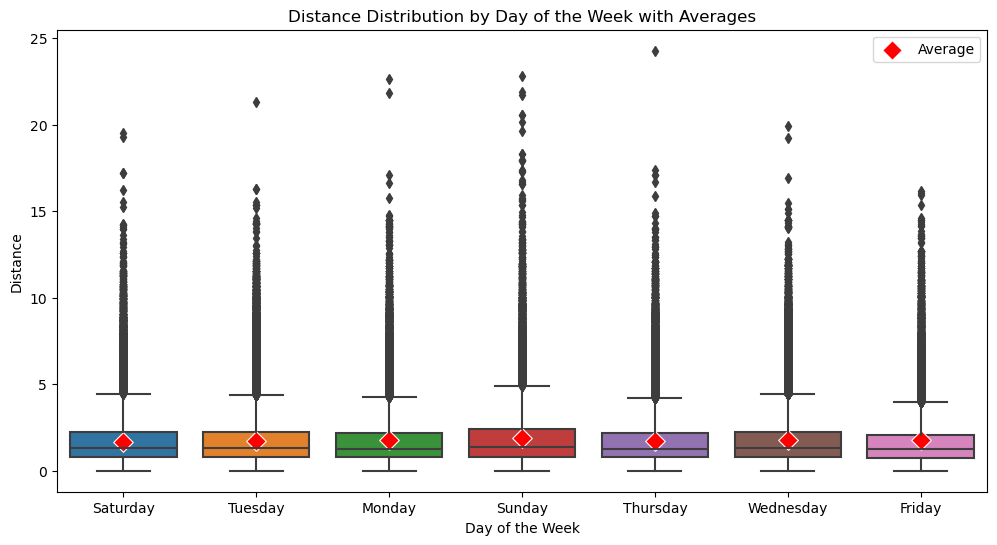

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='distance_km', data=df2)

# Calculate average distances for each day of the week
avg_distances = df2.groupby('day_of_week')['distance_km'].mean().reset_index()

# Overlay average values on the box plot
sns.scatterplot(x='day_of_week', y='distance_km', data=avg_distances, color='red', s=100, label='Average', marker='D')

# Add title and labels
plt.title('Distance Distribution by Day of the Week with Averages')
plt.xlabel('Day of the Week')
plt.ylabel('Distance')
plt.legend()